The project includes using clustering analysis to cluster stocks based on similar characteristics or minimum correlation for a diversified portfolio.

Context: The stock market is a great place to invest in for the future. Investing fights inflation, creates wealth, offers tax benefits, and yields substantial long-term growth. Investing early yields a bigger retirement corpus thanks to compound interest, and stocks can fulfill financial goals. Maintain diverse stock portfolio for higher returns, less risk. Cluster analysis helps identify stocks with similar characteristics and minimum correlation, making stock analysis less tedious. We analyze stock data and categorizes based on attributes, sharing insights. Data includes stock prices and financial indicators. 

Data Dictionary:

- Ticker Symbol: Abbreviation to identify a stock
- Security: Name of the company
- GICS Sector: Economic sector assigned to a company
- GICS Sub Industry: Sub-industry group assigned to a company
- Current Price: Stock price in dollars
- Price Change: Percentage change in stock price in 13 weeks
- Volatility: Standard deviation of stock price over past 13 weeks
- ROE: Financial performance measure
- Cash Ratio: Ratio of cash reserves to total current liabilities
- Net Cash Flow: Difference between cash inflows and outflows
- Net Income: Revenues minus expenses, interest, and taxes
- Earnings Per Share: Net profit divided by common shares outstanding
- Estimated Shares Outstanding: Total shares held by all shareholders
- P/E Ratio: Ratio of current stock price to earnings per share
- P/B Ratio: Ratio of stock price per share to book value per share

## Importing necessary libraries and data

In [1]:
import sklearn as s
s.__version__

'1.2.2'

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist, cdist

# to perform k-means clustering, compute metric
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform PCA
from sklearn.decomposition import PCA

In [3]:
# loading the dataset
data = pd.read_csv("stock_data.csv")

## Data Overview

In [4]:
data.shape

(340, 15)

- The dataset has 340 rows and 15 columns

In [5]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

In [6]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [7]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

Ticker, Security, GICS Sector and Sub Industry are objects, all others are numeric. No NULL values in dataset.

In [8]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

In [9]:
# Ticker_Symbol is an abbreviation to identify the stocks, and is not required for further analysis
# Dropping Ticker Symbol
df.drop("Ticker_Symbol", axis=1, inplace=True)

In [10]:
# lets check duplicate observations
df.duplicated().sum()

0

- There are no duplicate records in the dataset

In [11]:
# lets check total null values 
df.isnull().sum().sum()

0

- There are no null or missing values in the dataset

In [12]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

count unique  \
Security                        340    340   
GICS_Sector                     340     11   
GICS_Sub_Industry               340    104   
Current_Price                 340.0    NaN   
Price_Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash_Ratio                    340.0    NaN   
Net_Cash_Flow                 340.0    NaN   
Net_Income                    340.0    NaN   
Earnings_Per_Share            340.0    NaN   
Estimated_Shares_Outstanding  340.0    NaN   
P/E_Ratio                     340.0    NaN   
P/B_Ratio                     340.0    NaN   

                                                             top freq  \
Security                                 American Airlines Group    1   
GICS_Sector                                          Industrials   53   
GICS_Sub_Industry             Oil & Gas Exploration & Production   16   
Current_Price                                                NaN  NaN   
Price_Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash_Ratio                                                   NaN  NaN   
Net_Cash_Flow                                                NaN  NaN   
Net_Income                                                   NaN  NaN   
Earnings_Per_Share                                           NaN  NaN   
Estimated_Shares_Outstanding                                 NaN  NaN   
P/E_Ratio                                                    NaN  NaN   
P/B_Ratio                                                    NaN  NaN   

                                           mean                std  \
Security                                    NaN                NaN   
GICS_Sector                                 NaN                NaN   
GICS_Sub_Industry                           NaN                NaN   
Current_Price                         80.862345          98.055086   
Price_Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash_Ratio                            70.023529          90.421331   
Net_Cash_Flow                   55537620.588235  1946365312.175789   
Net_Income                    1494384602.941176  3940150279.327936   
Earnings_Per_Share                     2.776662           6.587779   
Estimated_Shares_Outstanding    577028337.75403   845849595.417695   
P/E_Ratio                             32.612563          44.348731   
P/B_Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Security                                NaN          NaN          NaN   
GICS_Sector                             NaN          NaN          NaN   
GICS_Sub_Industry                       NaN          NaN          NaN   
Current_Price                           4.5       38.555       59.705   
Price_Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash_Ratio                              0.0         18.0         47.0   
Net_Cash_Flow                -11208000000.0 -193906500.0    2098000.0   
Net_Income                   -23528000000.0  352301250.0  707336000.0   
Earnings_Per_Share                    -61.2       1.5575        2.895   
Estimated_Shares_Outstanding    27672156.86  158848216.1  309675137.8   
P/E_Ratio                          2.935451    15.044653    20.819876   
P/B_Ratio                        -76.119077    -4.352056     -1.06717   

                                        75%            max  
Security                           

Data is right skewed with outliers. Higher ROE means more profits with less capital, preferred by investors. Cash ratio measures short term liability payment ability. Net cash flow is the money in and out of a business, while net income is the profit or loss. Prefer higher values for earnings per share, estimated shares outstanding, P/E, and P/B ratios. Negative P/B ratios signal financially distressed companies with more liabilities than assets.

## Exploratory Data Analysis (EDA)

<ipython-input-78-4fd399c880f7>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  if bins: sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")


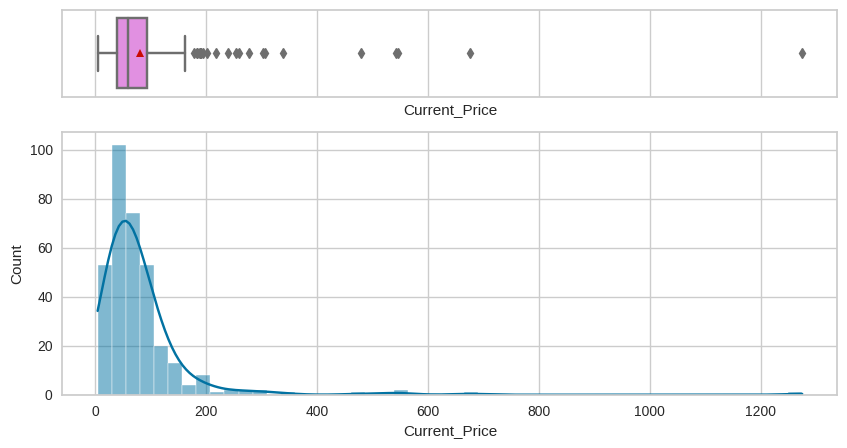

In [78]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=figsize)  # creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column 
    if bins: sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
      ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
      ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram
    
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
histogram_boxplot(df, num_cols[0], bins=50, kde=True, figsize=(10, 5))

- Current_Price is right skewed with several positive outliers

<ipython-input-13-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


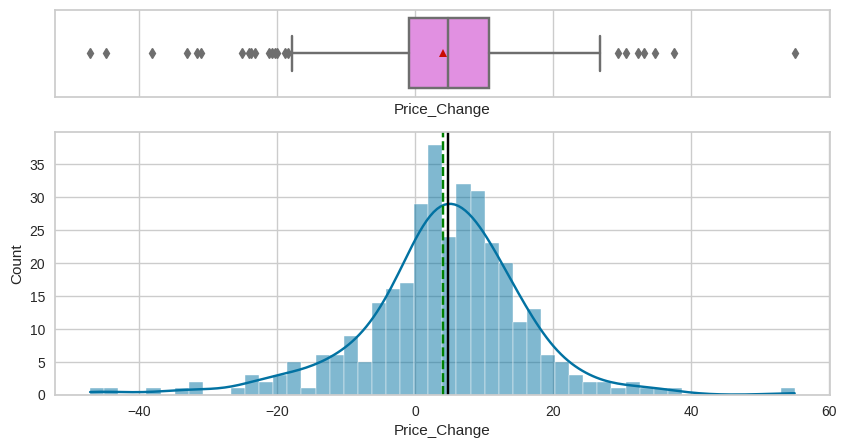

In [16]:
histogram_boxplot(df, num_cols[1], bins=50, kde=True, figsize=(10, 5))

- Price_Change has a somewhat normal distribution with some negative and positive outliers

<ipython-input-13-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


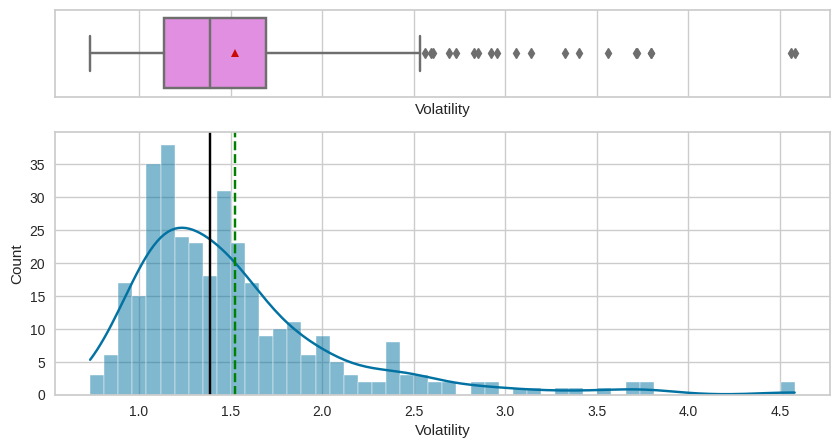

In [17]:
histogram_boxplot(df, num_cols[2], bins=50, kde=True, figsize=(10, 5))

- Volatility is right skewed with some positive outliers 

<ipython-input-13-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


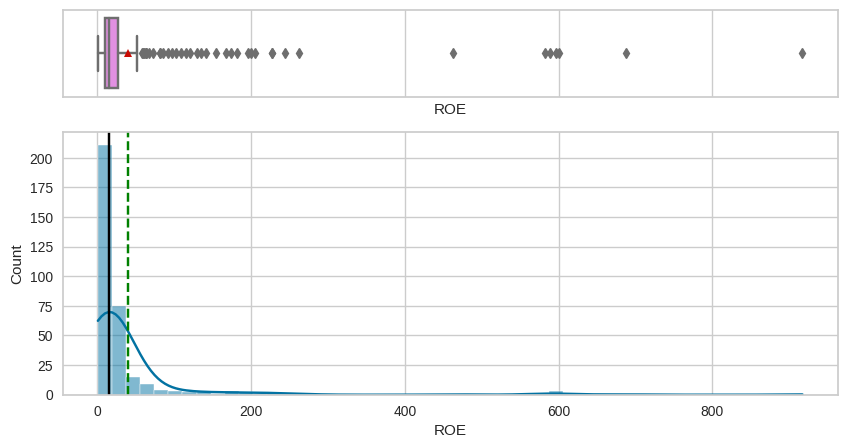

In [18]:
histogram_boxplot(df, num_cols[3], bins=50, kde=True, figsize=(10, 5))

- ROE is right skewed with several positive outliers 

<ipython-input-13-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


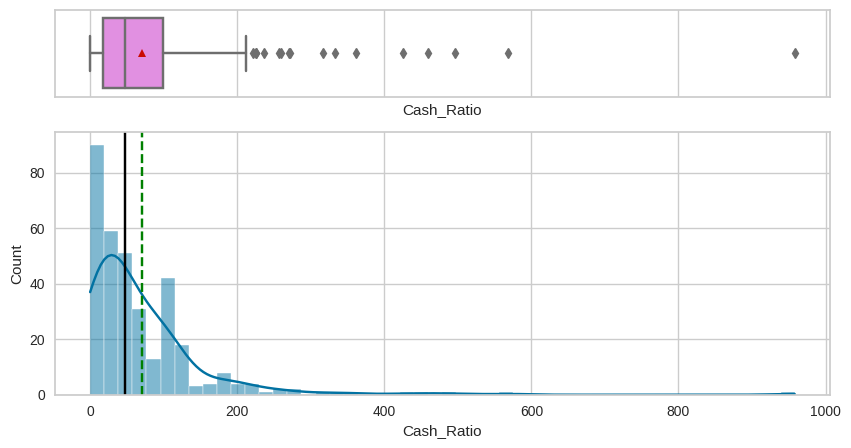

In [19]:
histogram_boxplot(df, num_cols[4], bins=50, kde=True, figsize=(10, 5))

- Cash_Ratio is right skewed with some positive outliers 

<ipython-input-13-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


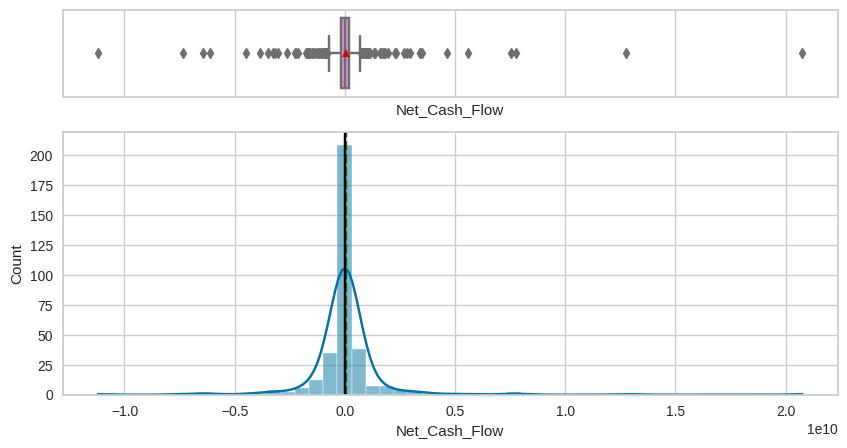

In [20]:
histogram_boxplot(df, num_cols[5], bins=50, kde=True, figsize=(10, 5))

- Net_Cash_Flow has a normal distribution with several positive and negative outliers 

<ipython-input-13-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


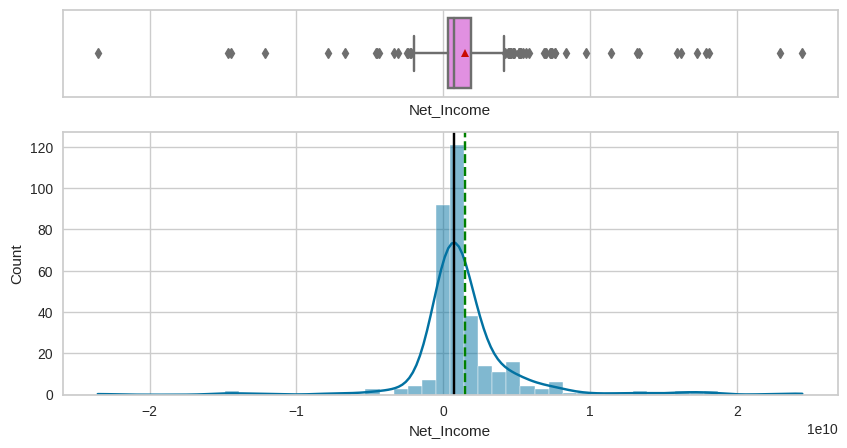

In [21]:
histogram_boxplot(df, num_cols[6], bins=50, kde=True, figsize=(10, 5))

- Net_Income has a normal distribution with some positive and a few negative outliers

<ipython-input-13-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


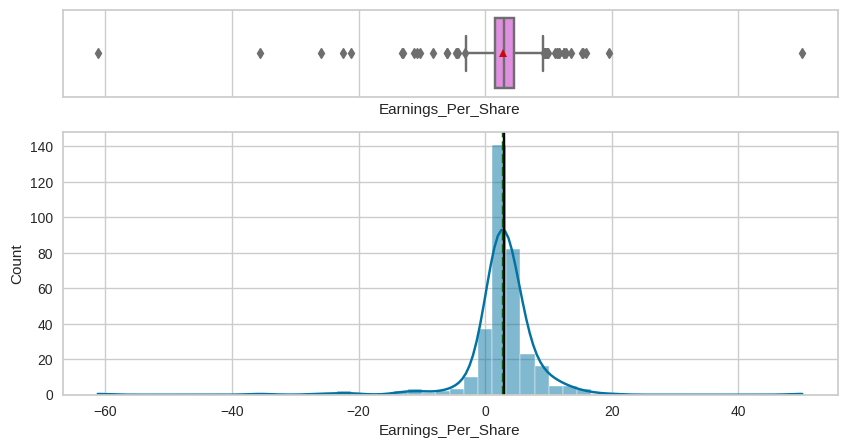

In [22]:
histogram_boxplot(df, num_cols[7], bins=50, kde=True, figsize=(10, 5))

- Earnings_Per_Share has a normal distribution with some positive and negative outliers 

<ipython-input-13-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


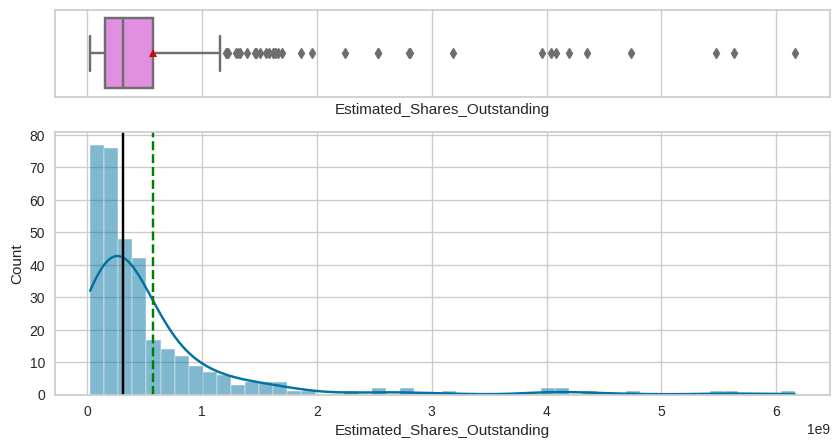

In [23]:
histogram_boxplot(df, num_cols[8], bins=50, kde=True, figsize=(10, 5))

- Estimated_Shares_Outstanding is right skewed with several positive outliers 

<ipython-input-13-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


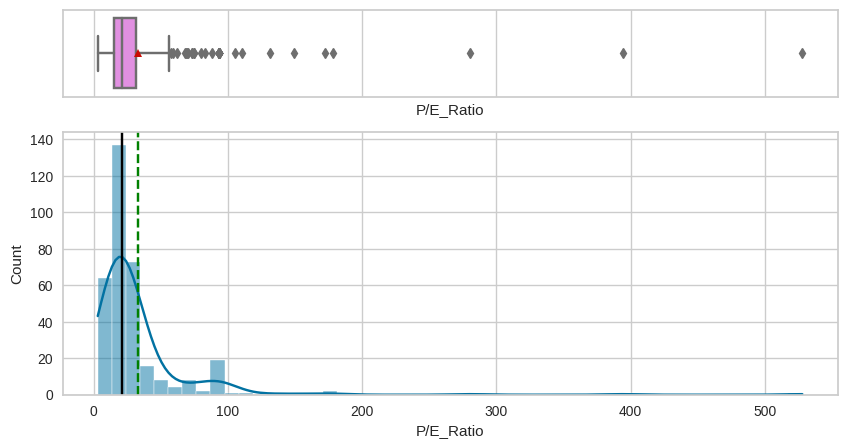

In [24]:
histogram_boxplot(df, num_cols[9], bins=50, kde=True, figsize=(10, 5))

- P/E_Ratio is right skewed with some positive outliers 

<ipython-input-13-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


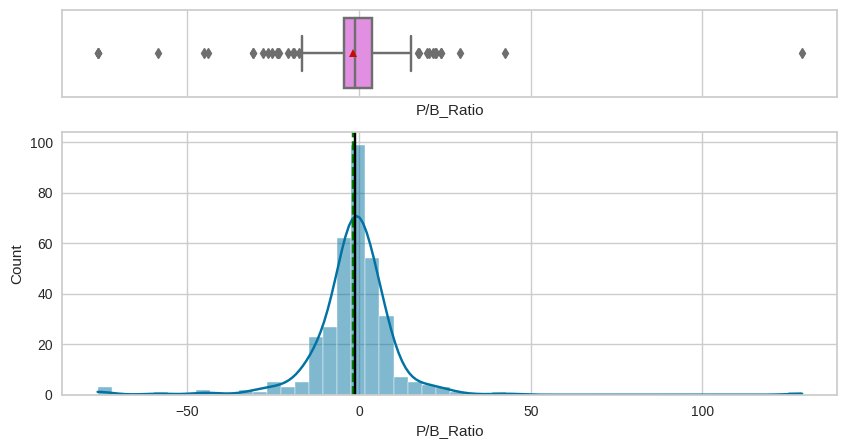

In [25]:
histogram_boxplot(df, num_cols[10], bins=50, kde=True, figsize=(10, 5))

- P/B_Ratio has a normal distribution with a few positive and negative outliers 

In [76]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None: plt.figure(figsize=(count + 1, 5))
    else: plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True: label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else: label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

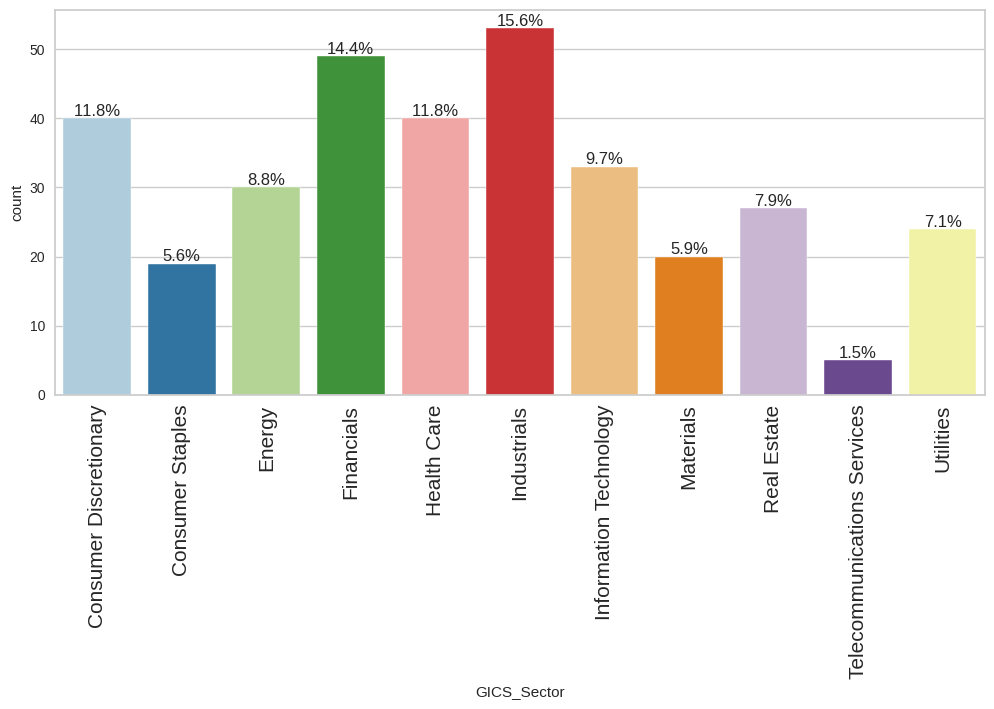

In [77]:
labeled_barplot(df, "GICS_Sector", perc=True)

- Majority of the securities belong to "Industries" GICS Sector and minority to "Telecommunication Services"

In [28]:
pd.crosstab(df.GICS_Sub_Industry, df.GICS_Sector).style.highlight_max(color="lightgreen", axis=0)

- Majority of the securities belong to "Oil & Gas Exploration & Production" GICS_Sub_Industry under "Energy" GICS_Sector

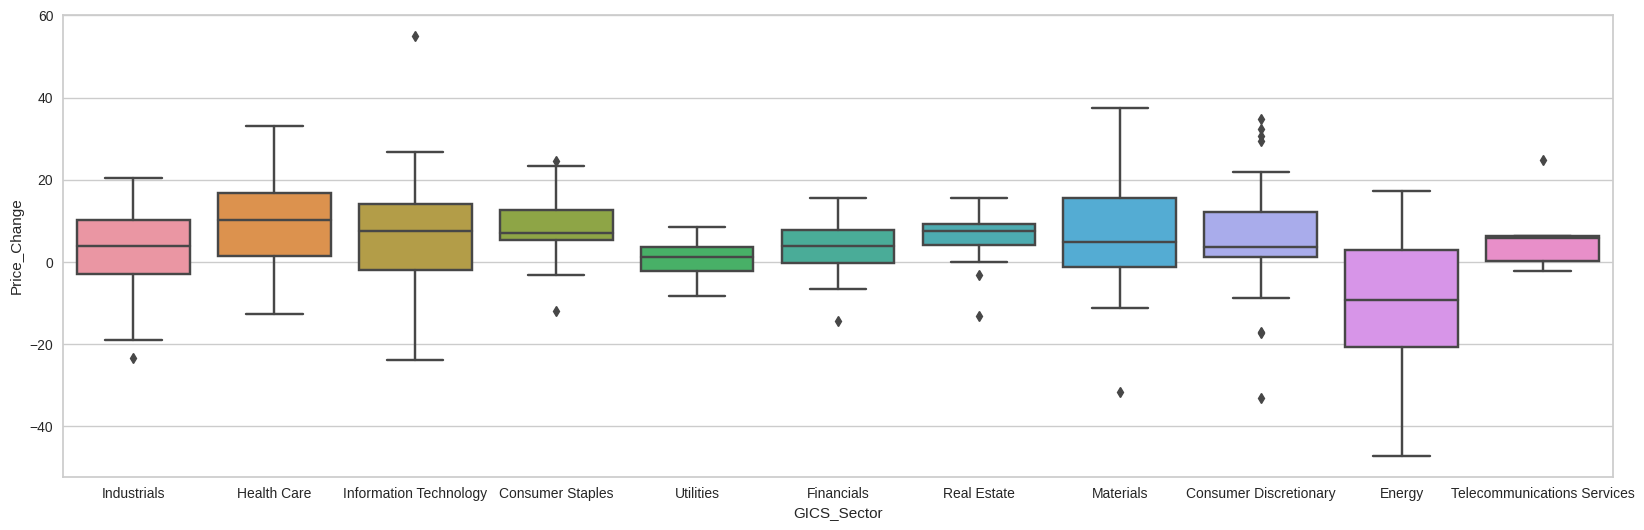

In [29]:
# Bivariate analysis
# Stock Price_Change Vs. GICS_Sector
plt.figure(figsize=(20,6))
sns.boxplot(data = df, y = "Price_Change", x = "GICS_Sector");

Real estate has the least Price_Change variation, while Energy GICS_Sector has the most. Healthcare and Information Technology are preferred as they have many securities with high positive Price_Change.

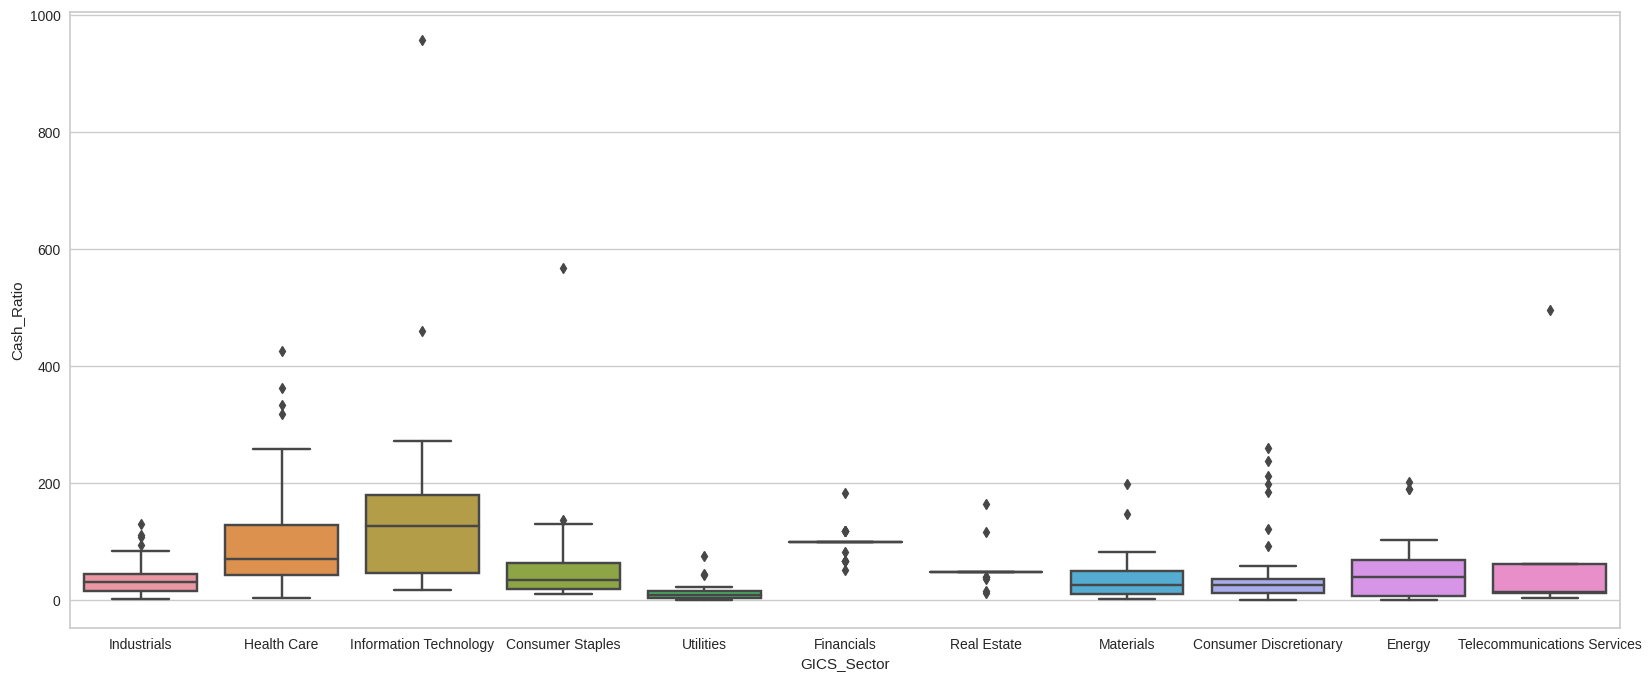

In [30]:
# Cash_Ratio Vs. GICS_Sector
plt.figure(figsize=(20,8))
sns.boxplot(data = df, y = "Cash_Ratio", x = "GICS_Sector");

Real Estate and Financials have low Cash_Ratio variance, while Information Technology and Health Care have high variance. Financials and Informational_Sector have high median Cash_Ratios. Informational Technology has high positive Cash_Ratio outliers.

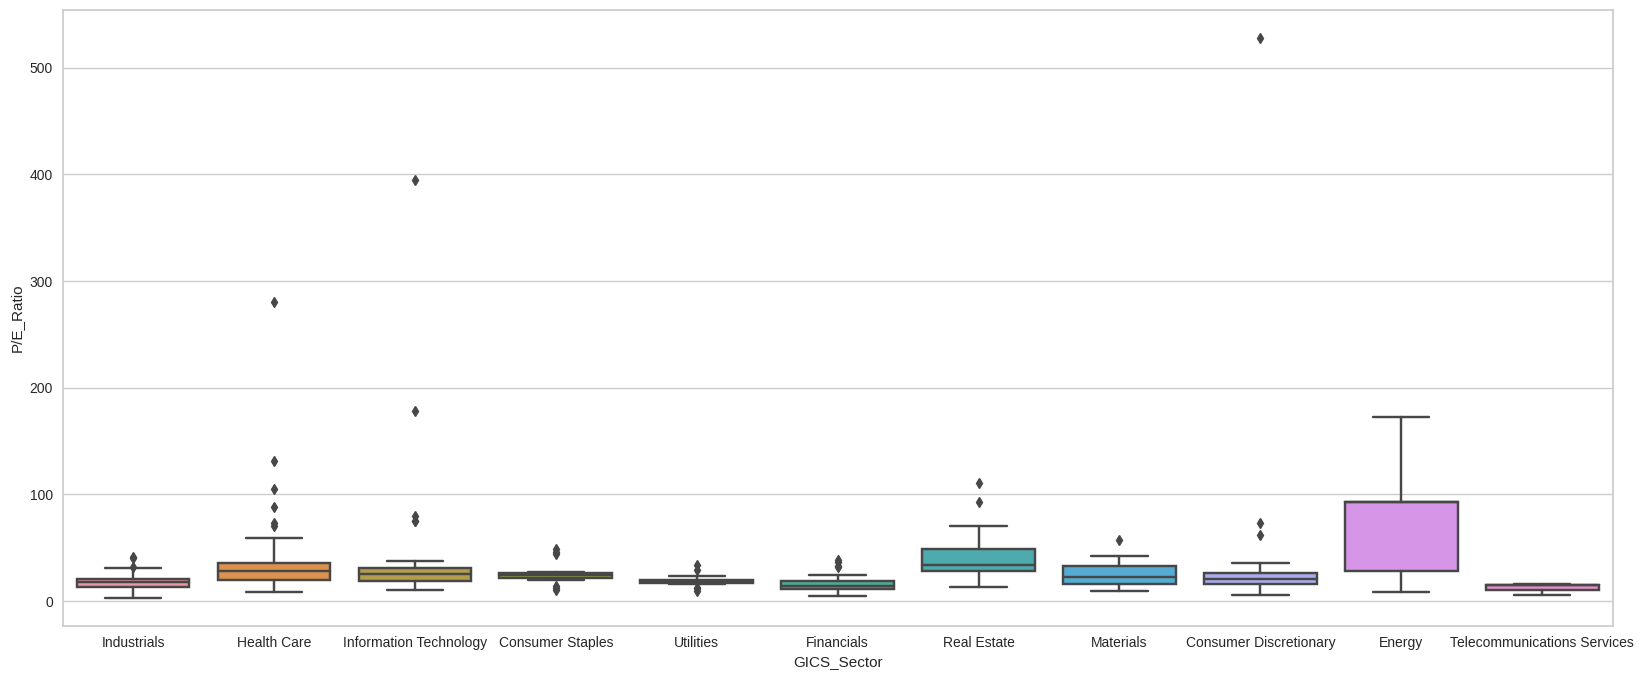

In [31]:
# P/E_Ratio Vs. GICS_Sector
plt.figure(figsize=(20,8))
sns.boxplot(data = df, y = "P/E_Ratio", x = "GICS_Sector");

Energy GICS_Sector has high P/E ratio variance and some companies with high P/E ratios. Investors are willing to invest more in a single share in this sector per earnings dollar than other sectors.

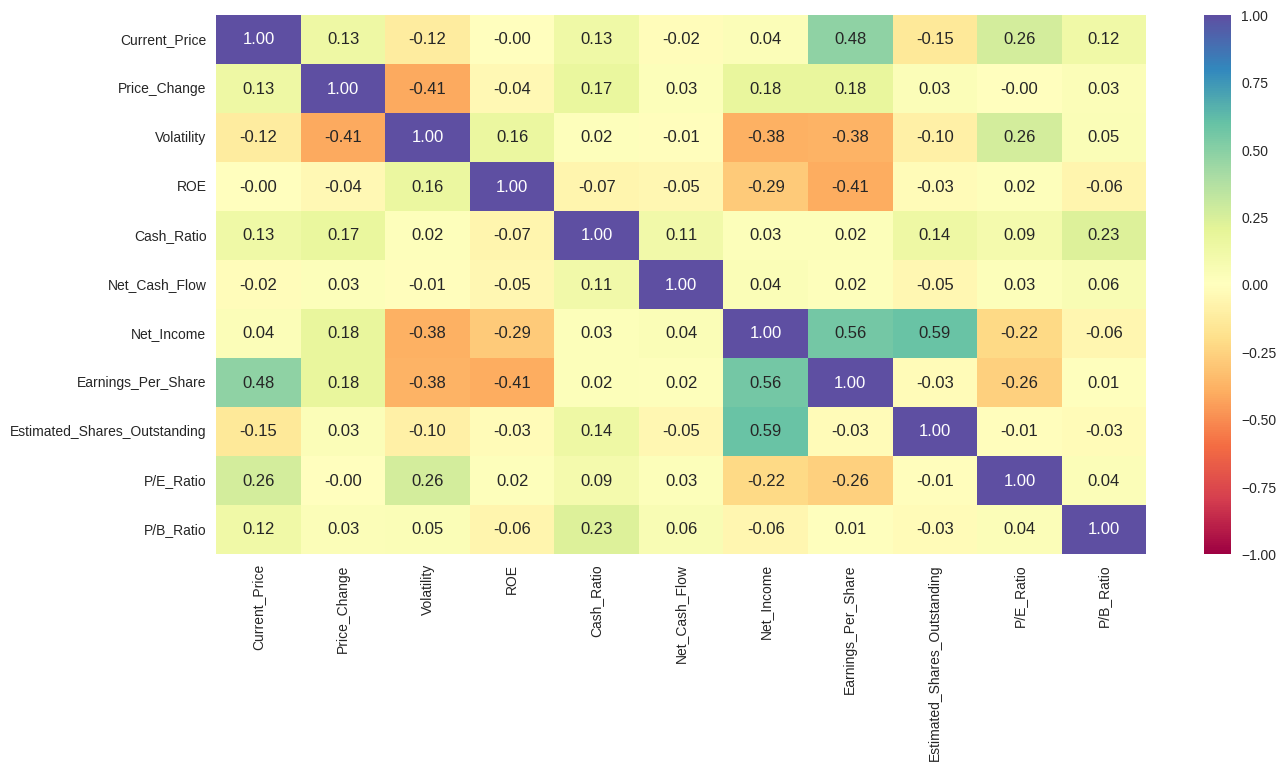

In [32]:
# check for correlations
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Price_Change negatively correlates with Volatility. More volatile stocks have a "negative" Price_Change. Earnings_Per_Share positively correlates with Current_Price and Net_Income. Estimated_Shares_Outstanding positively correlates with Net_Income. Earnings_Per_Share negatively correlates with ROE and Volatility.

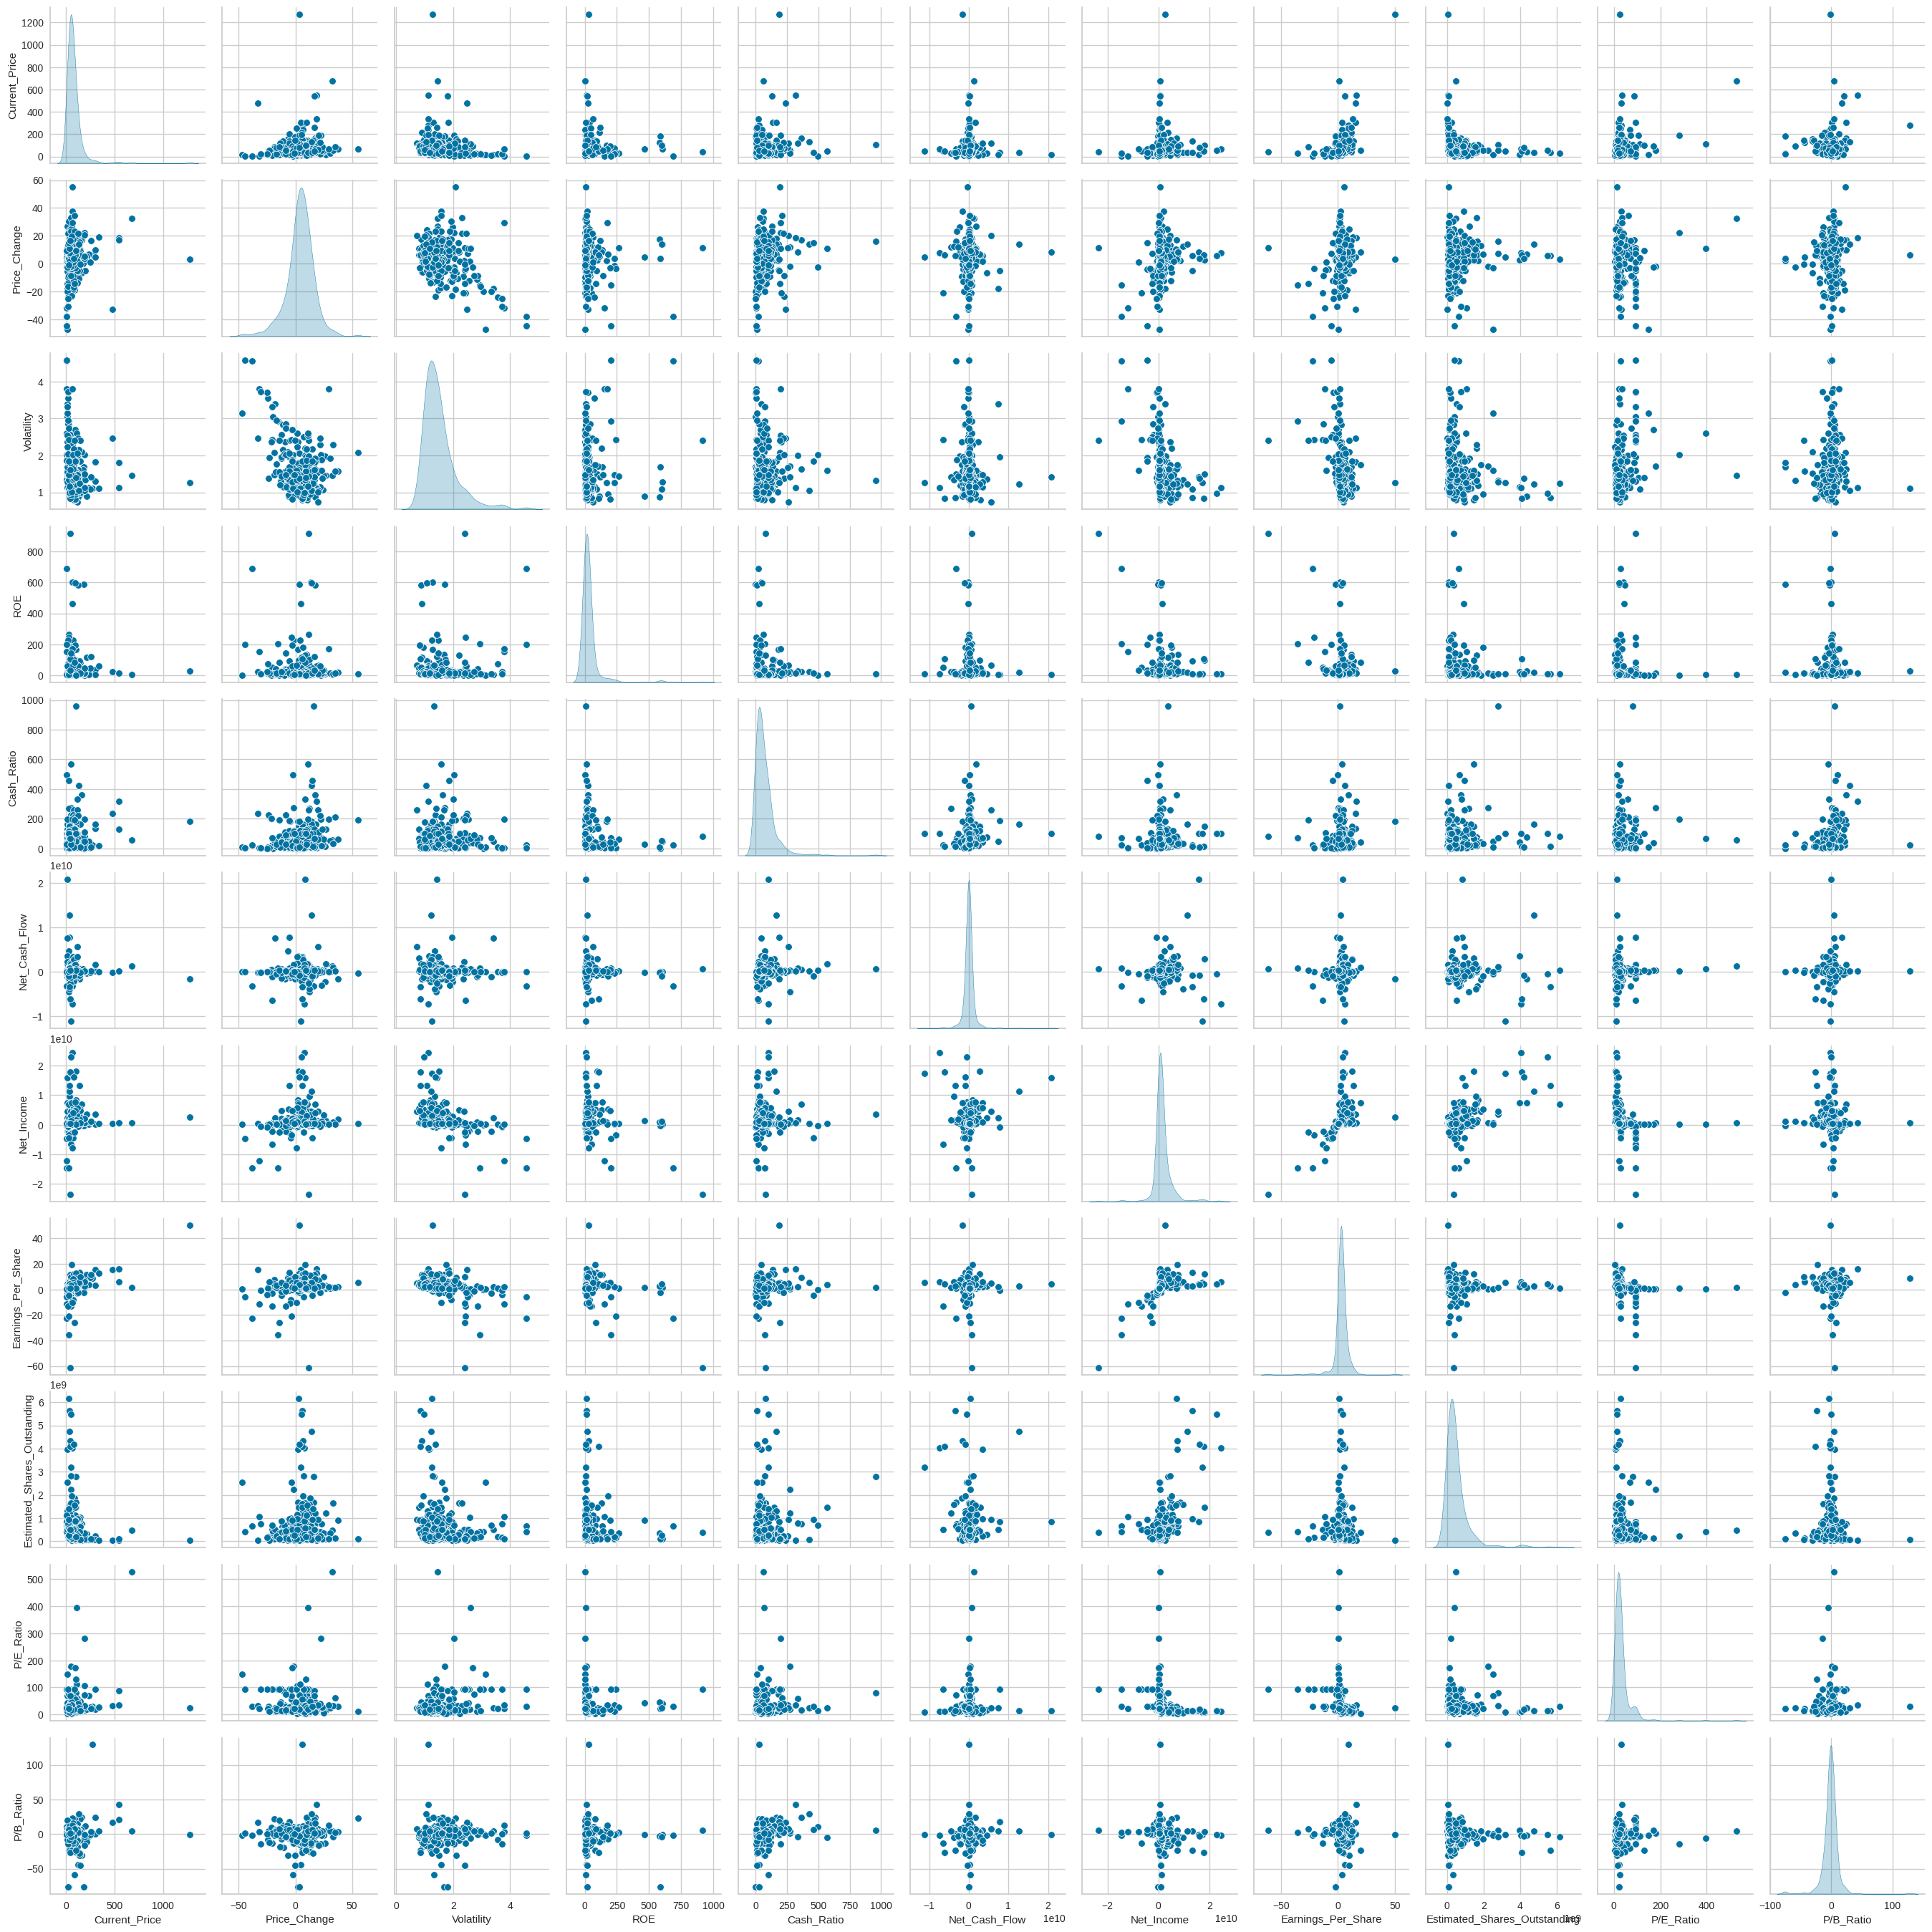

In [33]:
# Pair-plot analysis
sns.pairplot(df[num_cols],diag_kind="kde");

P/E Ratio is bimodal, volatility is trimodal, while most other distributions have a somewhat normal distribution.

## Data Preprocessing

In [34]:
# Scaling the data to bring it to the same scale 
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(sc.fit_transform(df.drop(["Security", "GICS_Sector", "GICS_Sub_Industry"], axis=1)),
                                columns=df.drop(["Security", "GICS_Sector", "GICS_Sub_Industry"], axis=1).columns)
subset_scaled_df.head()

Current_Price  Price_Change  Volatility       ROE  Cash_Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

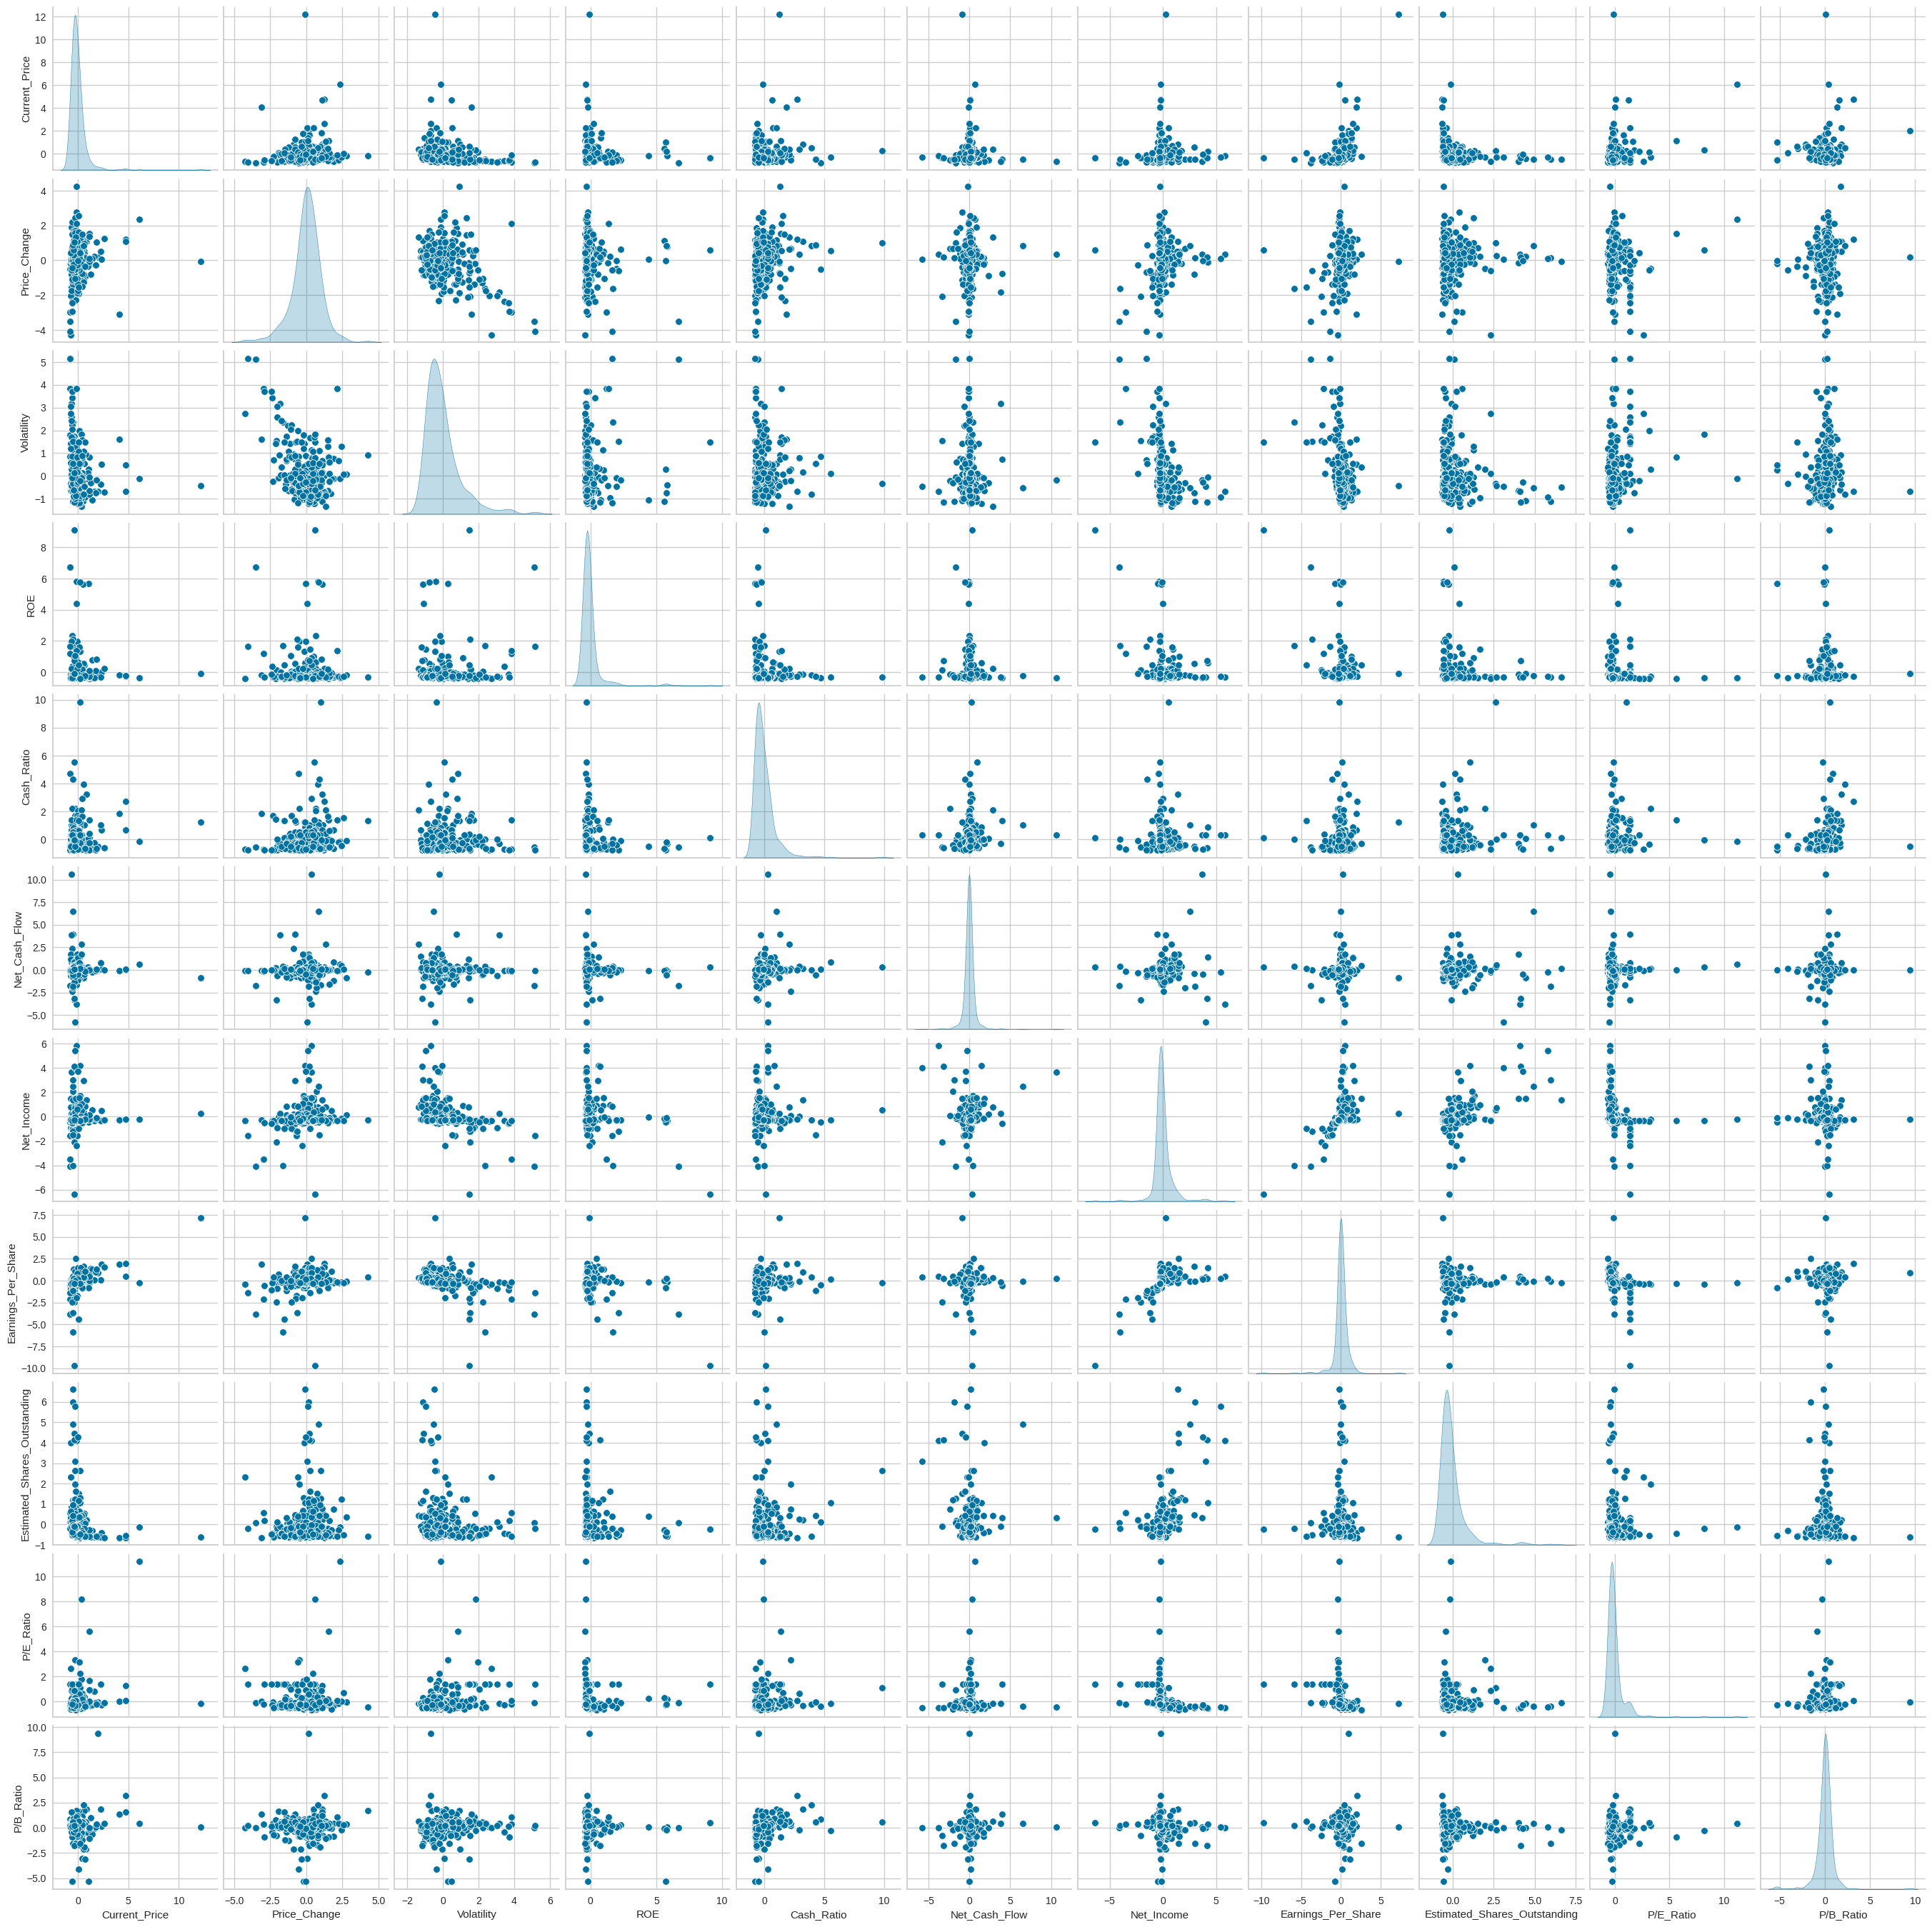

In [35]:
# Pair-plot analysis
sns.pairplot(subset_scaled_df ,diag_kind="kde");

After feature engineering, attributes maintained relationships while being standardized with an average of 0 and standard deviation of 1. No missing or duplicate data present. Outliers are recognized as real data points and not anomalies, but not treated in this modeling context.

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.679774234405551
Number of Clusters: 2 	Average Distortion: 2.4364205560428123
Number of Clusters: 3 	Average Distortion: 2.3160980567314295
Number of Clusters: 4 	Average Distortion: 2.181263969595645
Number of Clusters: 5 	Average Distortion: 2.1416209029188056
Number of Clusters: 6 	Average Distortion: 2.0801425491980465
Number of Clusters: 7 	Average Distortion: 2.026058735613768
Number of Clusters: 8 	Average Distortion: 2.021351310274698


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

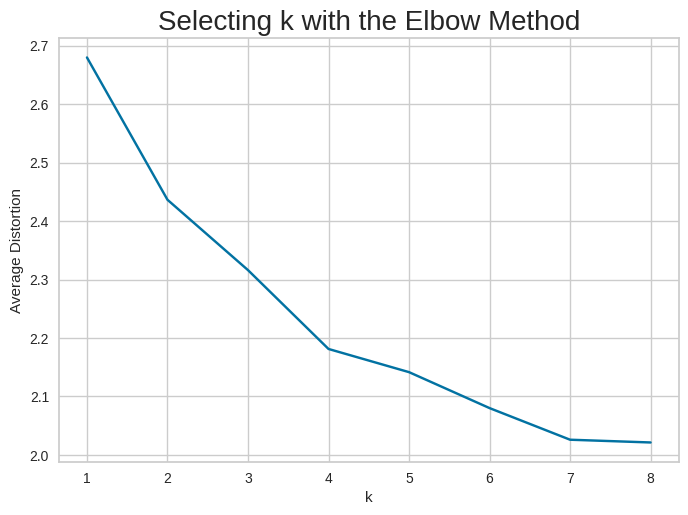

In [75]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k,n_init='auto')
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

- Appropriate K seems to be 4 or 5

In [74]:
# checking silhoutte score

sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters,n_init='auto')
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.47417251315118586)
For n_clusters = 3, silhouette score is 0.48532940371307526)
For n_clusters = 4, silhouette score is 0.48574178798572804)
For n_clusters = 5, silhouette score is 0.5084018150207555)
For n_clusters = 6, silhouette score is 0.4798274128377898)
For n_clusters = 7, silhouette score is 0.11655164420773975)
For n_clusters = 8, silhouette score is 0.12550667482829178)
For n_clusters = 9, silhouette score is 0.1785694221292979)


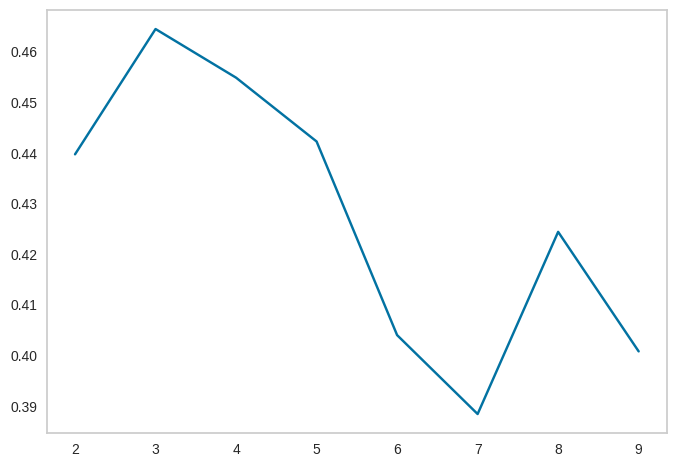

In [38]:
plt.plot(cluster_list,sil_score)
plt.grid()

- From Silhouette score, 4 seems to be a good approximate for number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


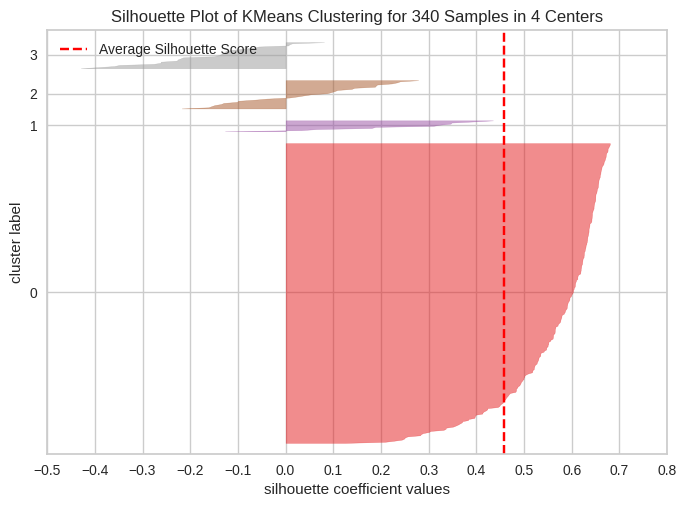

In [39]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


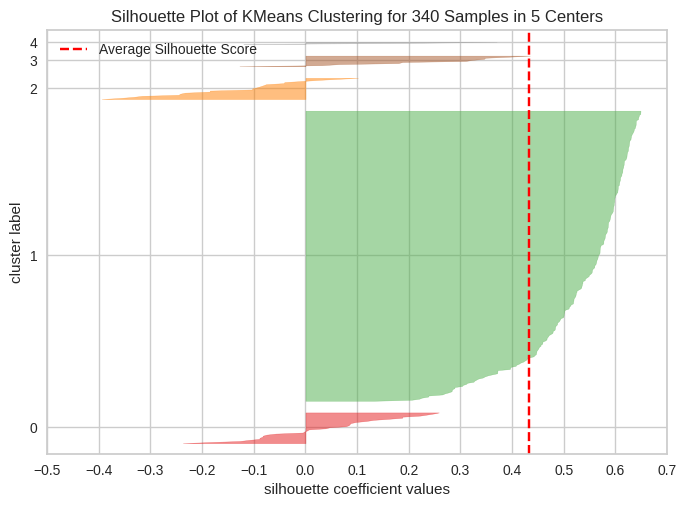

In [40]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


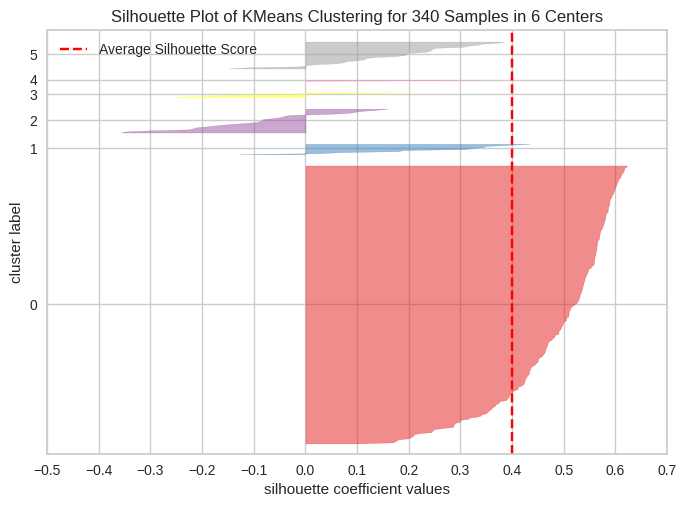

In [41]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

In [42]:
# Choosing k=4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)
df['K_means_segments'] = kmeans.labels_
subset_scaled_df['K_means_segments'] = kmeans.labels_
cluster_profile = df.groupby('K_means_segments').mean()
cluster_profile['count_in_each_segments'] = df.groupby('K_means_segments')['Security'].count().values
cluster_profile

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

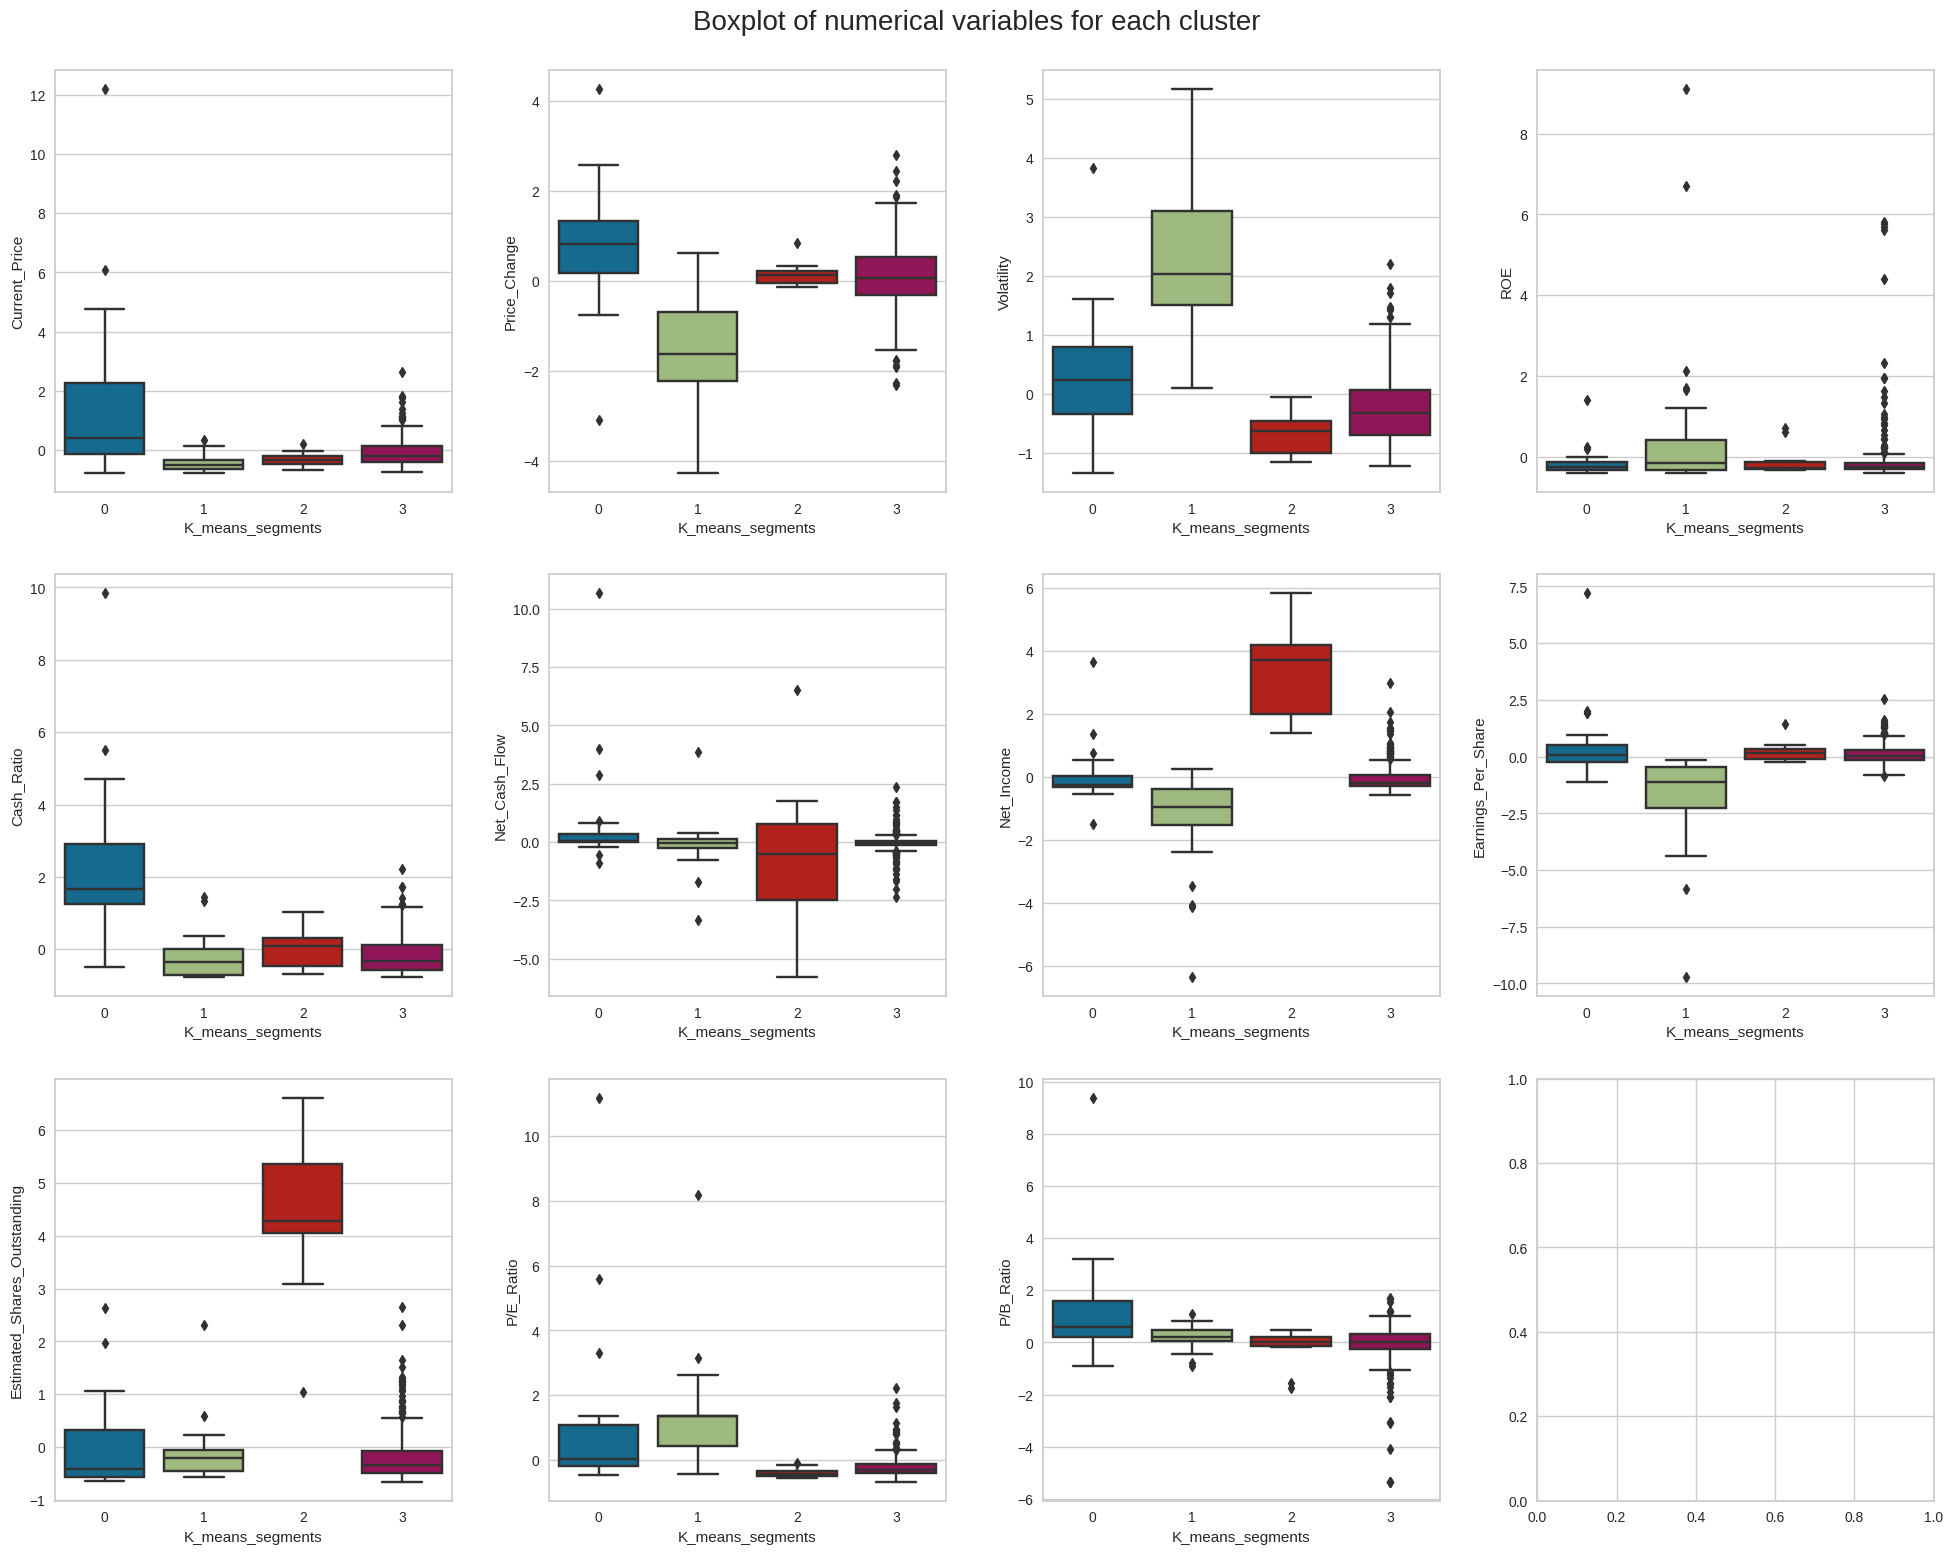

In [47]:
fig, axes = plt.subplots(3, 4,  figsize=(20, 16))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=subset_scaled_df[num_cols[counter]],x=subset_scaled_df['K_means_segments'])
        counter = counter+1

fig.tight_layout(pad=2.0)

Insights
- Cluster 0: 25 securities with high average Current_Price of $234 and high Cash_Ratio, earnings per share and P/B_Ratio. 

- Cluster 1: 27 securities with low average Current_Price of $38, negative average Price_Change and high volatility, low Cash_Ratio, Net_Income and Earnings_Per_Share. 

- Cluster 2: 11 securities similar to Cluster 3 with highest Net_Income and Estimated_Shares_Outstanding. Safe clusters are 2 and 3 while riskier are 0 and 1.

- Cluster 3: Majority of securities with intermediate Current_Price, Price_Change and volatility. 

In [48]:
# Comparing cluster vs. GICS_Sector
pd.crosstab(df.GICS_Sector, df.K_means_segments).style.highlight_max(color = 'lightgreen', axis = 0)

- Cluster 0: mostly Health Care, then Consumer Discretionary and Informational Technology. 

- Cluster 1: mostly Energy. 

- Cluster 2: mostly Financials. 

- Cluster 3: diverse, with Industrials, Financials, Consumer Discretionary, Real Estate and Informational Technology.

## Hierarchical Clustering

In [49]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print("Cophenetic correlation for {} distance and {} linkage is {}".format(dm.capitalize(), lm, c))
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9304469769832865
Cophenetic correlation for Euclidean distance and complete linkage is 0.8559480642212798
Cophenetic correlation for Euclidean distance and average linkage is 0.946403836884538
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7508819056084053
Cophenetic correlation for Chebyshev distance and single linkage is 0.9161627445317929
Cophenetic correlation for Chebyshev distance and complete linkage is 0.822502094153258
Cophenetic correlation for Chebyshev distance and average linkage is 0.9379218754329659
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9153206618543516
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9348505176633238
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6881861661402056
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9360657692078034
Cophenetic correlation for

In [50]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print("Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage".format(high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]))

Highest cophenetic correlation is 0.946403836884538, which is obtained with Euclidean distance and average linkage


In [51]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]
for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9304469769832865
Cophenetic correlation for complete linkage is 0.8559480642212798
Cophenetic correlation for average linkage is 0.946403836884538
Cophenetic correlation for centroid linkage is 0.9494262703881242
Cophenetic correlation for ward linkage is 0.7436374975239648
Cophenetic correlation for weighted linkage is 0.7508819056084053


In [52]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print("Highest cophenetic correlation is {}, which is obtained with {} linkage".format(high_cophenet_corr, high_dm_lm[1]))

Highest cophenetic correlation is 0.9494262703881242, which is obtained with centroid linkage


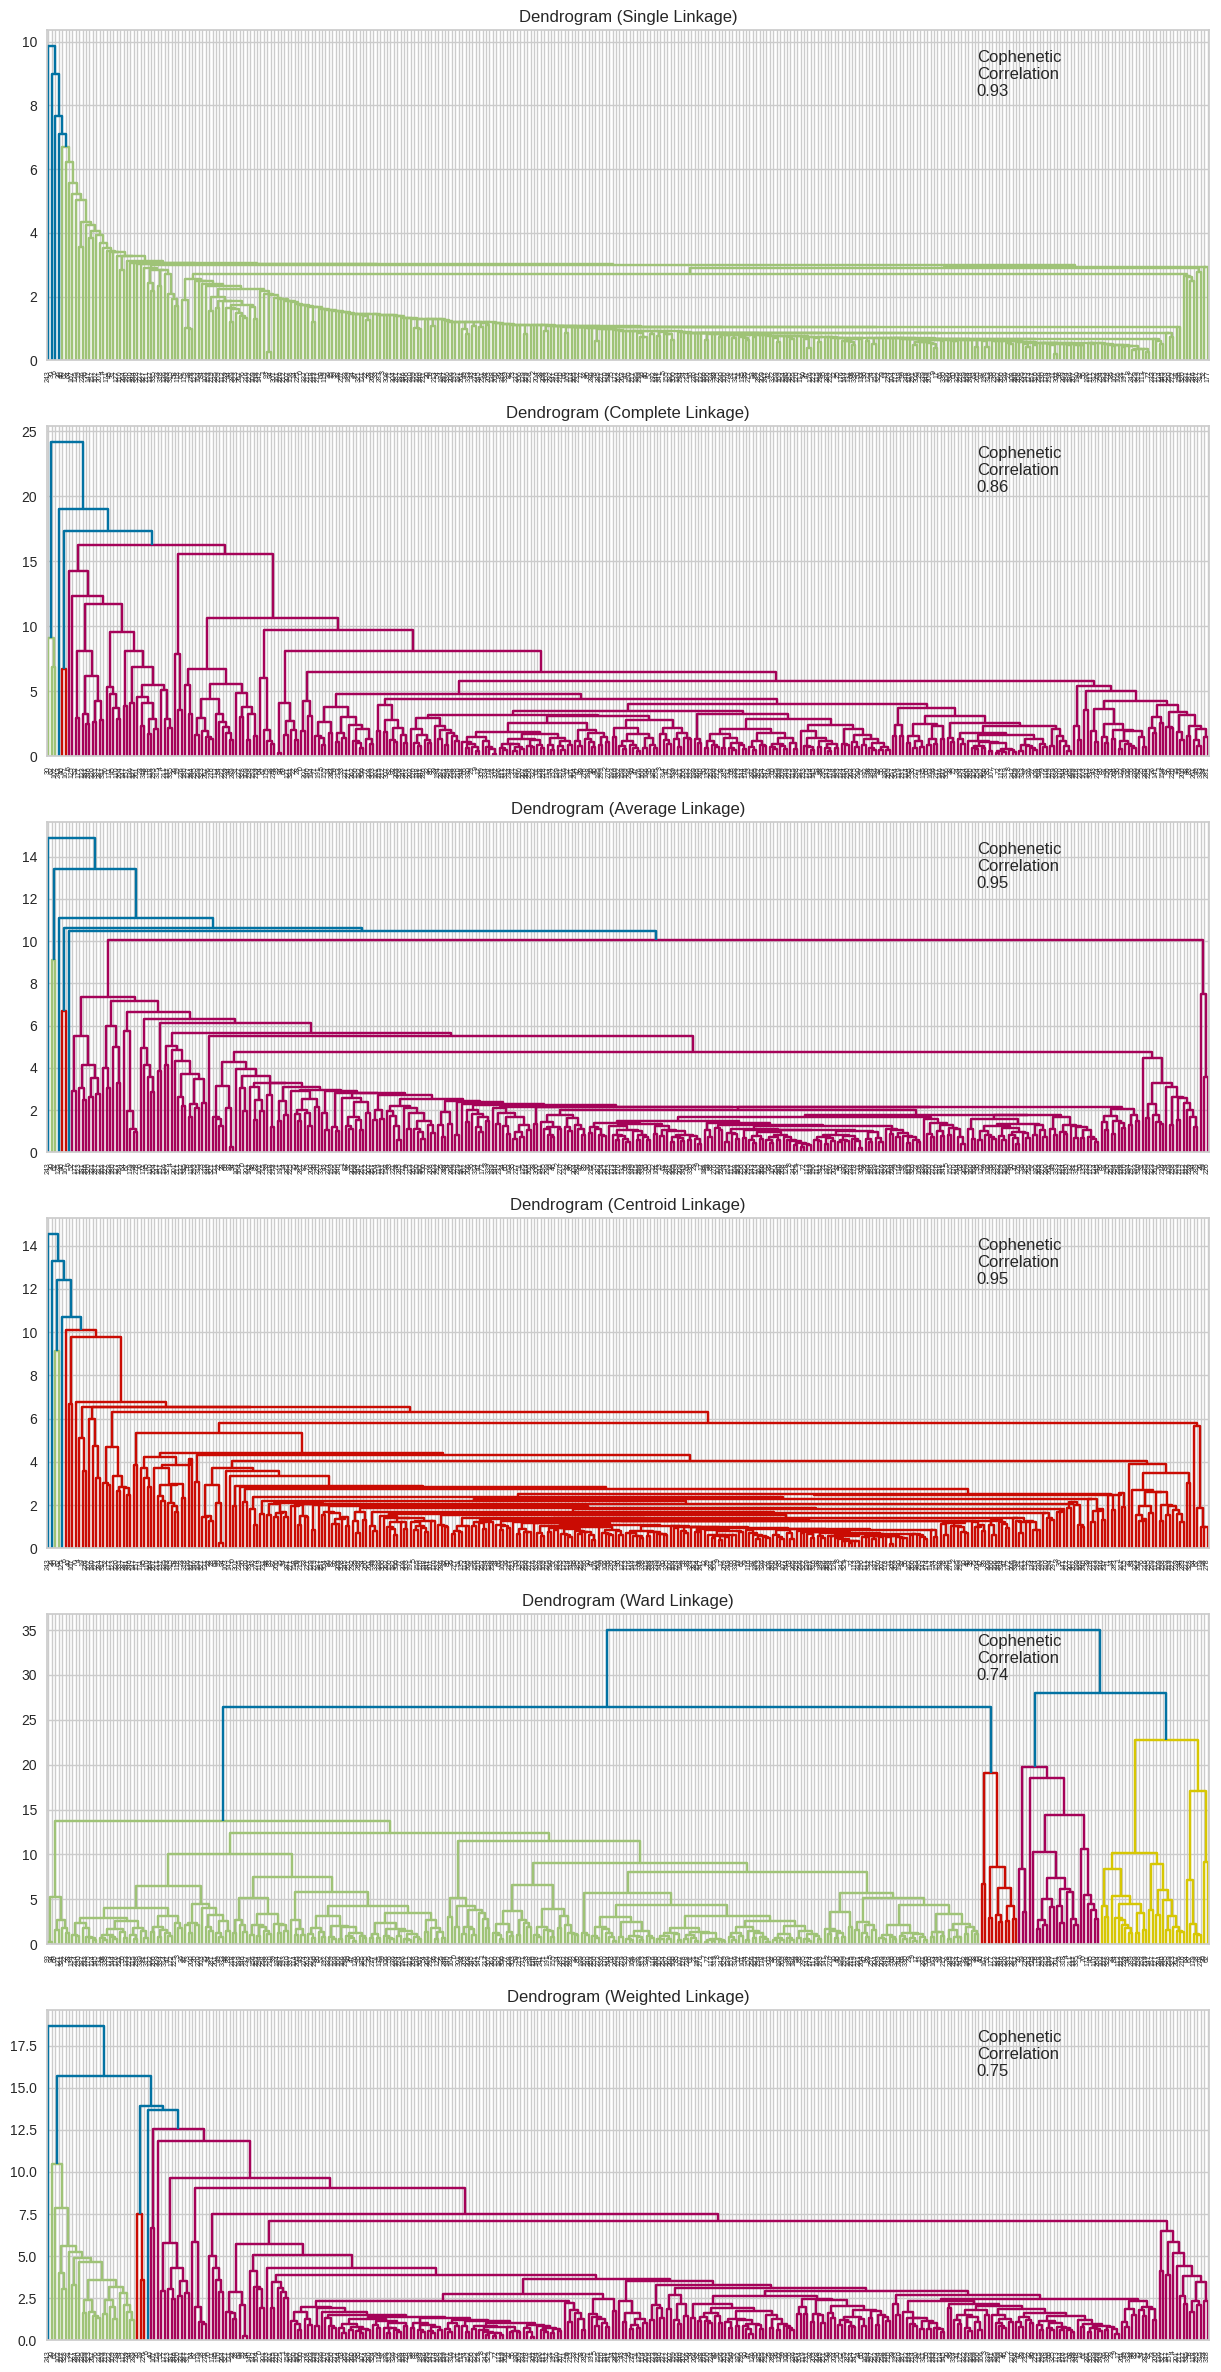

In [53]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]
# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(f"Cophenetic\nCorrelation\n{coph_corr:0.2f}", (0.80, 0.80), xycoords="axes fraction")

High cophenetic correlation with euclidean distance & avg/centroid linkages. 6 clusters seem appropriate from dendrogram (avg linkage).

In [54]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=6)

In [55]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_
cluster_profile = df.groupby("HC_Clusters").mean()
cluster_profile["count_in_each_segments"] = (df.groupby("HC_Clusters")["Security"].count().values)
cluster_profile

5 clusters with insufficient variability. Trying Ward linkage for distinct and separated clusters seen from its dendrogram. 4 clusters seem appropriate based on the Ward linkage dendrogram.

In [59]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_
cluster_profile = df.groupby("HC_Clusters").mean()
cluster_profile["count_in_each_segments"] = (df.groupby("HC_Clusters")["Security"].count().values)
cluster_profile

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=4)

- Now, the clusters appear to have more variability

In [64]:
# let's see the names of the securities in each cluster
for cl in df["HC_Clusters"].unique():
    print("The",df[df["HC_Clusters"] == cl]["Security"].nunique(),"Securities in cluster",cl,"are:",)
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 273 Securities in cluster 1 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 '

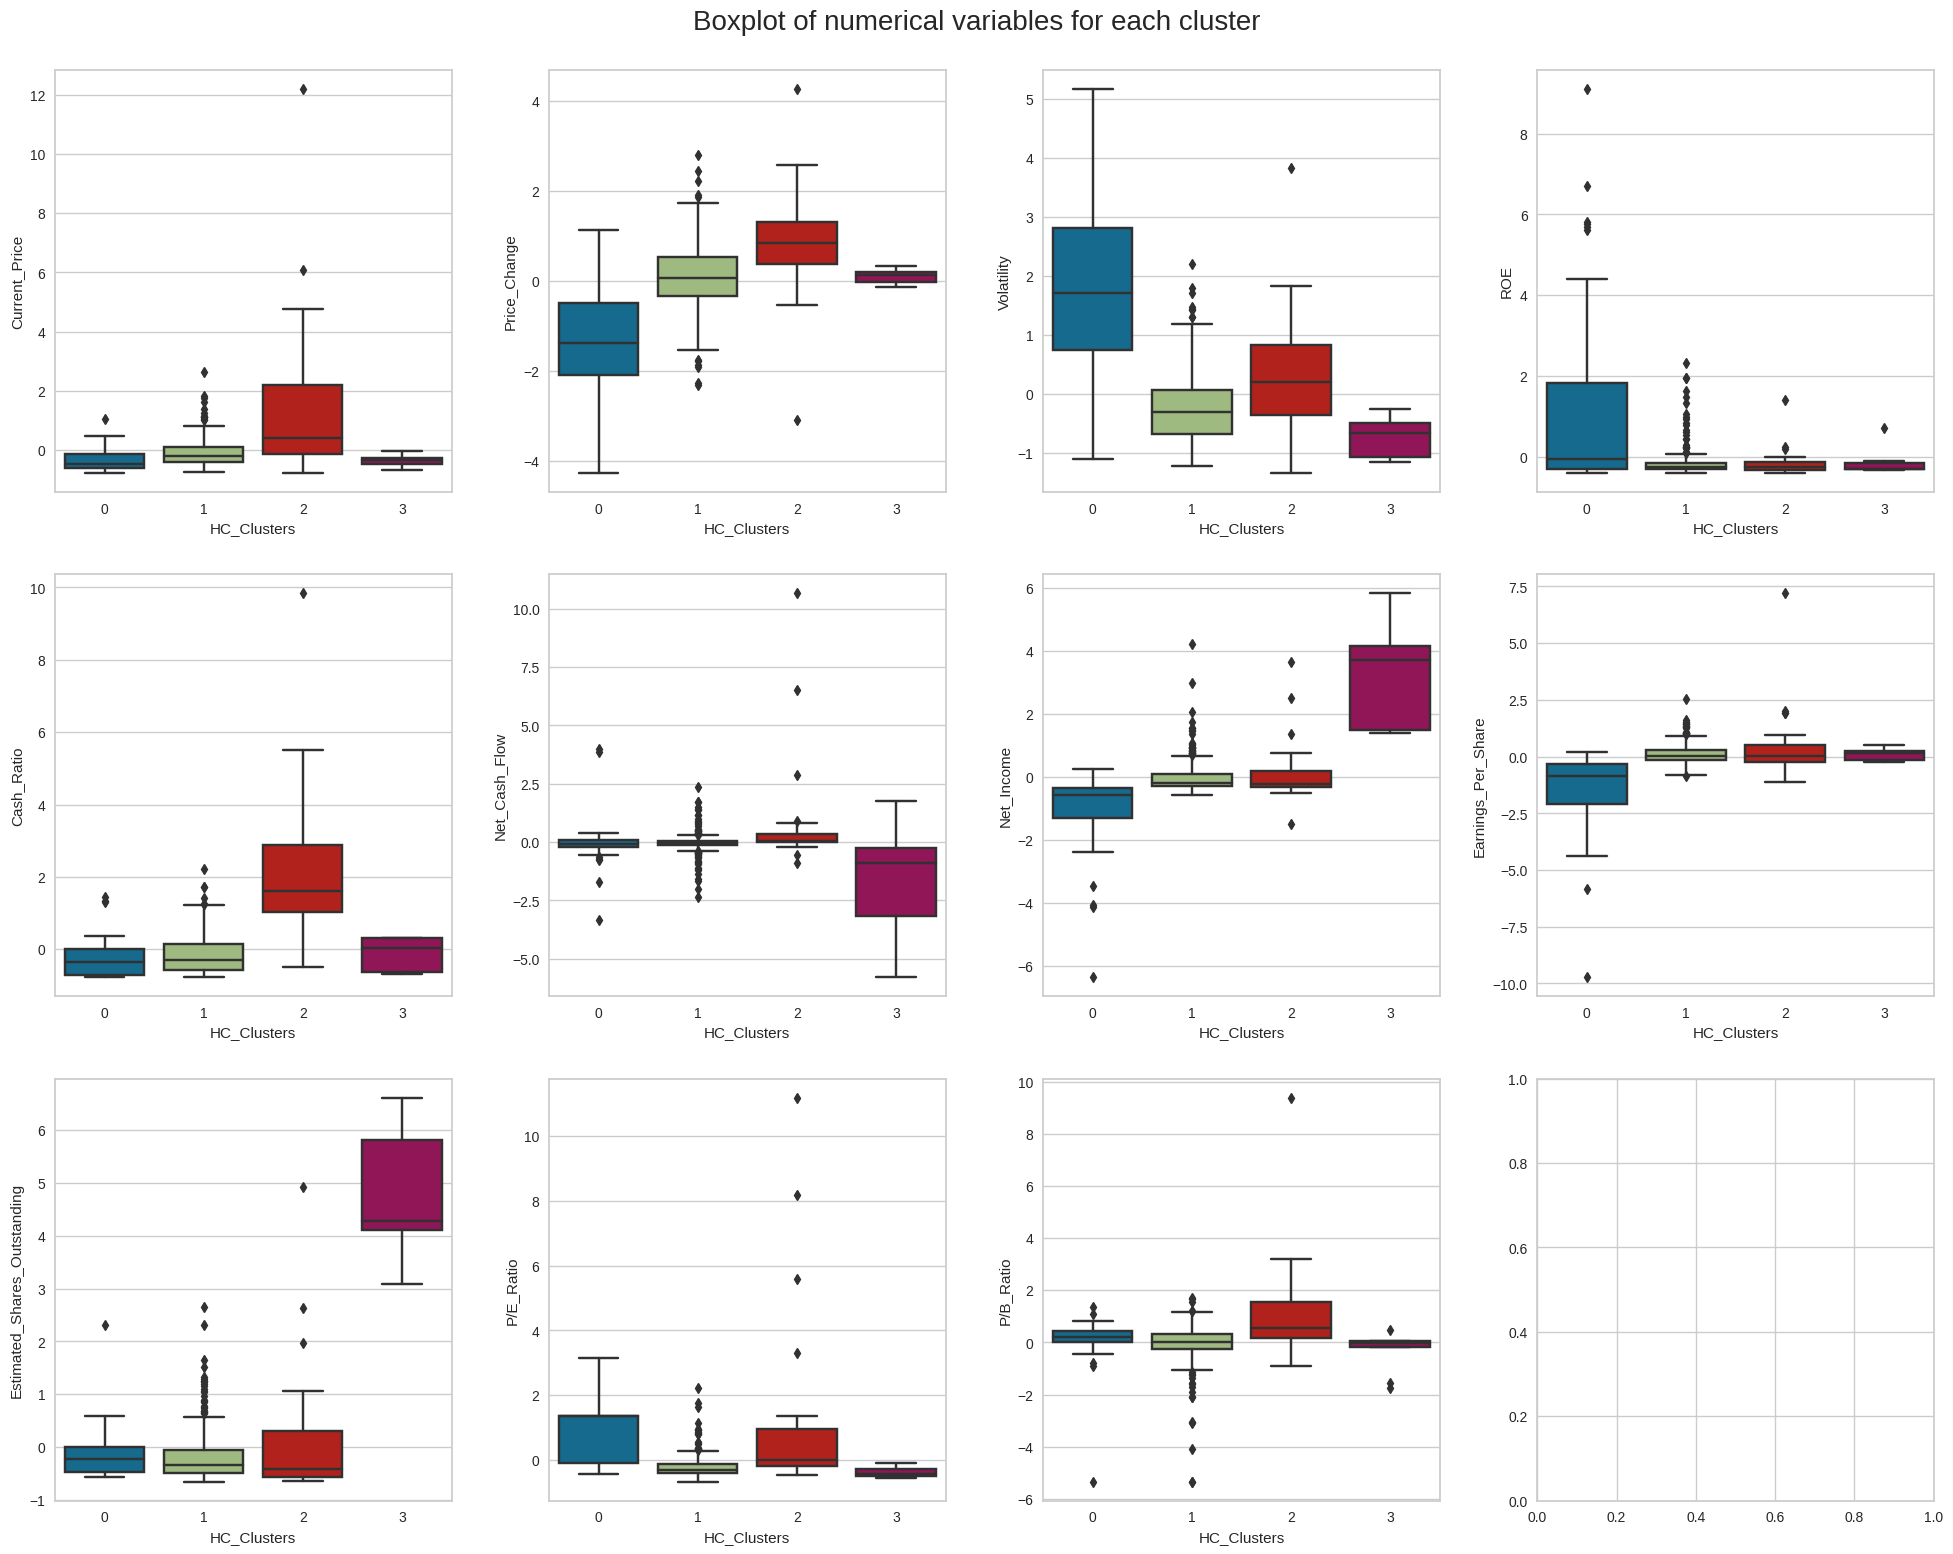

In [65]:
fig, axes = plt.subplots(3, 4,  figsize=(20, 16))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=subset_scaled_df[num_cols[counter]],x=subset_scaled_df['HC_Clusters'])
        counter = counter+1

fig.tight_layout(pad=2.0)

Hierarchical clustering and K-Means clustering show similar results. 

- Cluster 0 is like K-Means' cluster 1

- Cluster 1 is like K-Means' cluster 3 

- Cluster 2 is like K-Means' cluster 0 

- Cluster 3 is like K-Means' cluster 2.

In [66]:
# Comparing cluster vs. GICS_Sector
pd.crosstab(df.GICS_Sector, df.HC_Clusters).style.highlight_max(color = 'lightgreen', axis = 0)

- The results are quite similar to as was observed with K-Means clustering

## K-means vs Hierarchical Clustering

In [67]:
# Comparing Hierarchical cluster vs. K-means  cluster
pd.crosstab(df.K_means_segments, df.HC_Clusters).style.highlight_max(color = 'lightgreen', axis = 0)

4 clusters from K-Means and Hierarchical Clustering group 331 out of 340 securities similarly. PCA visualizes these clusters in 2D space.

### Dimensionality Reduction using PCA for visualization

In [68]:
# PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are
# setting the number of components to 2
pca = PCA(n_components=2)
# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(data=X_reduced_pca, columns=["Component 1", "Component 2"])
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

- The first two principal components explain 38.9% of the variance in the data

### Scatterplot by cluster labels - K-Means Clustering

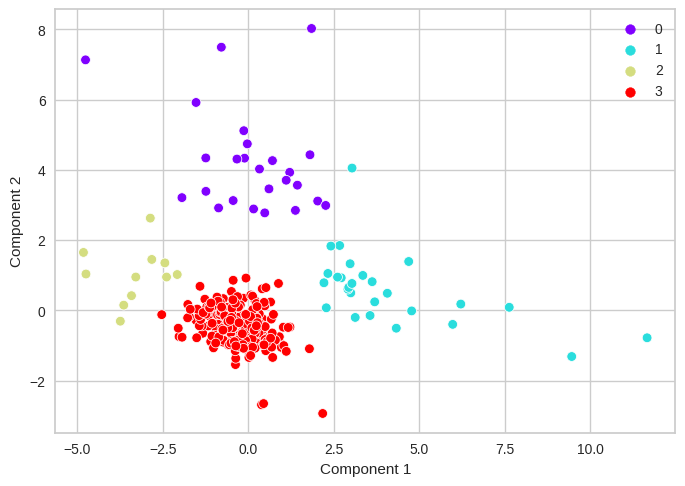

In [70]:
sns.scatterplot(data=reduced_df_pca,x="Component 1",y="Component 2",hue=df["K_means_segments"],palette="rainbow")
plt.legend(bbox_to_anchor=(1, 1))

### Scatterplot by cluster labels - HierarchicalClustering

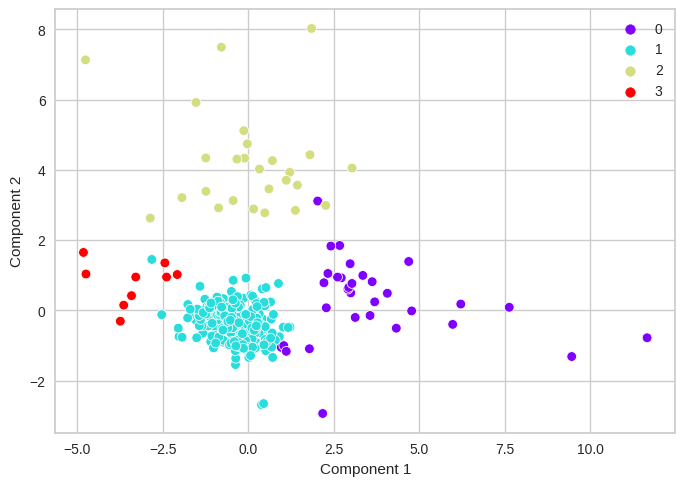

In [71]:
sns.scatterplot(data=reduced_df_pca,x="Component 1",y="Component 2",hue=df["HC_Clusters"],palette="rainbow")
plt.legend(bbox_to_anchor=(1, 1))

The 4 clusters are well separated, with 1 cluster having most data points and others capturing outliers. Overall, K-Means and Hierarchical clustering have similar clusters, with minor differences.

# **Insights:**

- Skewed data for Current_Price and Estimated_Shares_Outstanding

- Health Care and Financial sectors show positive Price_Change

- IT and Financial sectors have higher Cash_Ratios

- Real Estate is a safe investment choice

- Energy sector is volatile with high P/E_Ratios. An investor prefers investing more in Energy sector shares compared to other sectors based on their earnings.

Two clustering methods clustered 331 securities similarly out of 340, with only 9 being different. 

The industry segregation yielded similar results in both algorithms. PCA revealed similar cluster densities for both techniques. 

One cluster (25+ securities) was identified as very aggressive and high performing in Health Care, Consumer Discretionary, and Information Technology. 

Another cluster (25+ securities) was very aggressive but historically low performing in Energy. 

A moderately aggressive and high performing cluster (~10 securities) was found in Financials. 

Lastly, a major cluster (270+ securities) was identified as mildly aggressive and safe, diversified in Industrials, Financials, Consumer Discretionary, Real Estate, and Information Technology.

## Recommendations


Stocks were categorized into 4 clusters based on aggressiveness and performance. This diversifies investments for maximal earnings in any market condition, but past indicators may not always predict the future. Analyze dynamic clustering and stock movement for better predictions amidst changing market conditions.